# University Similarity by Gower's Distance
An exploration of universities by [Gower's Distance](https://en.wikipedia.org/wiki/Gower%27s_distance), which accounts for categorical, binary, and numeric data types. 

If a student has a future univerity in mind, this would help them find other, similar schools to consider. 

In [299]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gower
# import regex as re
from sklearn.impute import SimpleImputer

### Initial Load Data, Preprocess, and Save

In [300]:
# load data from csv
df = pd.read_csv('data\Most-Recent-Cohorts-Institution-Filtered.csv')

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\rbouc\AppData\Local\Temp\ipykernel_13872\4230094888.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('data\Most-Recent-Cohorts-Institution-Filtered.csv')


In [301]:
# only keep the columns we need
# list of columns to retain
columns_retain = ['INSTNM', 'ACCREDAGENCY', 'ADM_RATE', 'SAT_AVG', 'PCIP01', 'PCIP03', 
                    'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10',
                    'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14',
                    'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22',
                    'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26',
                    'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31',
                    'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41',
                    'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
                    'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49',
                    'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54',
                    'UGDS', 'PCTPELL', 'C150_4', 'C150_L4',
                    'CCSIZSET', 'HBCU', 'PBI', 'ANNHI',
                    'AANAPII', 'HSI', 'NANTI',
                    'MENONLY', 'WOMENONLY', 'RELAFFIL',
                    'PCTFLOAN', 'DEBT_MDN', 'D_PCTPELL_PCTFLOAN',
                    'GRADS', 'STUFACR', 'SATVR50', 'SATMT50', 'ACTCM50',
                    'ACTEN50', 'ACTMT50']

# drop the columns we don't need
df = df[columns_retain]

In [302]:
# save the data to a new csv file
df.to_csv("data\SchoolData.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\rbouc\AppData\Local\Temp\ipykernel_13872\244733534.py:2: SyntaxWarning: invalid escape sequence '\M'
  df.to_csv("data\Most-Recent-Cohorts-Institution-Filtered.csv", index=False)


### Load and Clean Data

In [303]:
# load data from csv
df = pd.read_csv('data\Most-Recent-Cohorts-Institution-Filtered.csv')

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\rbouc\AppData\Local\Temp\ipykernel_13872\4230094888.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('data\Most-Recent-Cohorts-Institution-Filtered.csv')


In [304]:
# reduce dataset to only the rows where ADM_RATE is not null
df = df[df['ADM_RATE'].notnull()]
df = df[df['SAT_AVG'].notnull()]
df = df[df['ACCREDAGENCY'].notnull()]

# drop ACCREDAGENCY
df = df.drop(['ACCREDAGENCY'], axis=1)

In [305]:
# convert the 'INSTNM' column entries to drop special characters and convert to lowercase
#df['INSTNM'] = df['INSTNM'].apply(lambda x: re.sub(r'\W+', '', x.lower()))

In [306]:
# Create a new column that is 'PERCOMP' which is the higher value of C150_4 or C150_L4, or null if both are null
df['PERCOMP'] = df[['C150_4', 'C150_L4']].max(axis=1)

# drop the columns that are not needed
df = df.drop(columns=['C150_4', 'C150_L4'])

In [307]:
# replace all the values in column 'DEBT_MDN' that are not a number with NaN
df['DEBT_MDN'] = pd.to_numeric(df['DEBT_MDN'], errors='coerce')
# change datatype of column 'DEBT_MDN' to float
df['DEBT_MDN'] = df['DEBT_MDN'].astype(float)

In [308]:
df['CCSIZSET'] = df['CCSIZSET'].astype(int)

list_values1 = [-2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
text_values1 = ['Not applicable', 'Not classified', 'Two-year, very small', 'Two-year, small', 'Two-year, medium', 'Two-year, large', 'Two-year, very large', 'Four-year, very small, primarily nonresidential', 'Four-year, very small, primarily residential', 'Four-year, very small, highly residential', 'Four-year, small, primarily nonresidential', 'Four-year, small, primarily residential', 'Four-year, small, highly residential', 'Four-year, medium, primarily nonresidential', 'Four-year, medium, primarily residential', 'Four-year, medium, highly residential', 'Four-year, large, primarily nonresidential', 'Four-year, large, primarily residential', 'Four-year, large, highly residential', 'Exclusively graduate/professional']

# create a dictionary
replace_dict1 = dict(zip(list_values1, text_values1))

# replace all the values in column 'CCSIZSET' with the corresponding value in the dictionary
df['CCSIZSET'] = df['CCSIZSET'].replace(replace_dict1)



In [309]:
# create a function that identifies all the values in INSTNM that appear more than once
# then it removes those rows from the dataframe
def remove_duplicates(df):
    # get the list of duplicate values
    duplicate_list = df[df.duplicated(subset=['INSTNM'], keep=False)]['INSTNM'].tolist()
    print(duplicate_list)
    # remove the rows with duplicate values
    df = df[~df['INSTNM'].isin(duplicate_list)]
    return df

In [ ]:
# write a function that returns all the values in a column that are not numbers
def get_non_numeric_values(df, column_name):
    non_numeric_values = df[~df[column_name].str.isnumeric()][column_name].tolist()
    return non_numeric_values

In [310]:
df = remove_duplicates(df)

['Bethel University', 'Union College', "St. John's College", 'Bethel University', 'University of St Thomas', 'Westminster College', 'Union College', 'Union College', 'Bethel University', 'University of St Thomas', 'Westminster College', "St. John's College"]


In [311]:
# get list of values in column 'CCSIZSET'
df['CCSIZSET'].unique()


array(['Four-year, medium, highly residential',
       'Four-year, large, primarily nonresidential',
       'Four-year, medium, primarily residential',
       'Four-year, large, primarily residential',
       'Four-year, small, highly residential',
       'Four-year, small, primarily residential',
       'Four-year, very small, highly residential',
       'Four-year, medium, primarily nonresidential',
       'Four-year, very small, primarily residential', 'Two-year, small',
       'Four-year, very small, primarily nonresidential',
       'Four-year, large, highly residential',
       'Four-year, small, primarily nonresidential', 'Not applicable',
       'Two-year, very small', 'Two-year, very large', 'Two-year, medium'],
      dtype=object)

In [312]:
# replace all the NaN values in column 'RELAFFIL' with '-1'
df['RELAFFIL'] = df['RELAFFIL'].fillna(-1)
# change datatype of column 'RELAFFIL' to int
df['RELAFFIL'] = df['RELAFFIL'].astype(int)

list_values2 = [-1, -2, 22, 24, 27, 28, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 87, 88, 89, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 105, 106, 107]
text_values2 = ['Not reported', 'Not applicable', 'American Evangelical Lutheran Church', 'African Methodist Episcopal Zion Church', 'Assemblies of God Church', 'Brethren Church', 'Roman Catholic', 'Wisconsin Evangelical Lutheran Synod', 'Christ and Missionary Alliance Church', 'Christian Reformed Church', 'Evangelical Congregational Church', 'Evangelical Covenant Church of America', 'Evangelical Free Church of America', 'Evangelical Lutheran Church', 'International United Pentecostal Church', 'Free Will Baptist Church', 'Interdenominational', 'Mennonite Brethren Church', 'Moravian Church', 'North American Baptist', 'Pentecostal Holiness Church', 'Christian Churches and Churches of Christ', 'Reformed Church in America', 'Episcopal Church, Reformed', 'African Methodist Episcopal', 'American Baptist', 'American Lutheran', 'Baptist', 'Christian Methodist Episcopal', 'Church of God', 'Church of Brethren', 'Church of the Nazarene', 'Cumberland Presbyterian', 'Christian Church (Disciples of Christ)', 'Free Methodist', 'Friends', 'Presbyterian Church (USA)', 'Lutheran Church in America', 'Lutheran Church - Missouri Synod', 'Mennonite Church', 'United Methodist', 'Protestant Episcopal', 'Churches of Christ', 'Southern Baptist', 'United Church of Christ', 'Protestant, not specified', 'Multiple Protestant Denomination', 'Other Protestant', 'Jewish', 'Reformed Presbyterian Church', 'United Brethren Church', 'Missionary Church Inc', 'Undenominational', 'Wesleyan', 'Greek Orthodox', 'Russian Orthodox', 'Unitarian Universalist', 'Latter Day Saints (Mormon Church)', 'Seventh Day Adventists', 'The Presbyterian Church in America', 'Other (none of the above)', 'Original Free Will Baptist', 'Ecumenical Christian', 'Evangelical Christian', 'Presbyterian', 'General Baptist', 'Muslim', 'Plymouth Brethren']

# create a dictionary
replace_dict2 = dict(zip(list_values2, text_values2))

# replace all the values in column 'ICLEVEL' with the corresponding value in the dictionary
df['RELAFFIL'] = df['RELAFFIL'].replace(replace_dict2)

In [313]:
df['RELAFFIL'].unique()

array(['Not reported', 'United Methodist', 'Churches of Christ',
       'Southern Baptist', 'Baptist', 'Roman Catholic',
       'Presbyterian Church (USA)', 'Undenominational',
       'Evangelical Lutheran Church',
       'Christian Church (Disciples of Christ)', 'Seventh Day Adventists',
       'Other Protestant', 108,
       'Christian Churches and Churches of Christ', 'Interdenominational',
       'Church of God', 'The Presbyterian Church in America',
       'United Church of Christ', 'Christ and Missionary Alliance Church',
       'Church of the Nazarene', 'Latter Day Saints (Mormon Church)',
       'Free Methodist', 'Evangelical Covenant Church of America',
       'Evangelical Free Church of America', 'Friends',
       'American Baptist', 'Mennonite Church', 'Brethren Church',
       'United Brethren Church', 'Wesleyan', 'General Baptist',
       'Lutheran Church in America', 'Reformed Church in America',
       'Christian Reformed Church', 'Plymouth Brethren',
       'Other (none

In [314]:
# Iterate through the columns and impute the missing values with the median of that column
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = SimpleImputer(strategy='median').fit_transform(df[[column]])

In [315]:
# make the first column the index
df = df.set_index('INSTNM')

In [316]:
df.head()

,ADM_RATE,SAT_AVG,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,...,DEBT_MDN,D_PCTPELL_PCTFLOAN,GRADS,STUFACR,SATVR50,SATMT50,ACTCM50,ACTEN50,ACTMT50,PERCOMP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,0.6840,920.0,0.0333,0.0157,0.0059,0.0000,0.0000,0.0333,0.0802,0.0,...,16600.0,5107.0,801.0,19.0,470.0,450.0,17.0,16.0,16.0,0.2678
University of Alabama at Birmingham,0.8668,1291.0,0.0000,0.0000,0.0000,0.0007,0.0269,0.0000,0.0241,0.0,...,15832.0,13547.0,8607.0,18.0,650.0,650.0,27.0,27.0,25.0,0.6442
University of Alabama in Huntsville,0.7810,1259.0,0.0000,0.0000,0.0000,0.0000,0.0061,0.0000,0.0906,0.0,...,13905.0,7569.0,2068.0,17.0,650.0,685.0,26.0,28.0,26.0,0.6295
Alabama State University,0.9660,963.0,0.0000,0.0000,0.0000,0.0000,0.0604,0.0000,0.0750,0.0,...,17500.0,3499.0,532.0,14.0,480.0,455.0,18.0,17.0,16.0,0.2773
The University of Alabama,0.8006,1304.0,0.0000,0.0036,0.0000,0.0016,0.0944,0.0000,0.0139,0.0,...,17986.0,31685.0,6186.0,19.0,630.0,630.0,28.0,28.0,26.0,0.7276


### Visualizations to Understand Data Shape

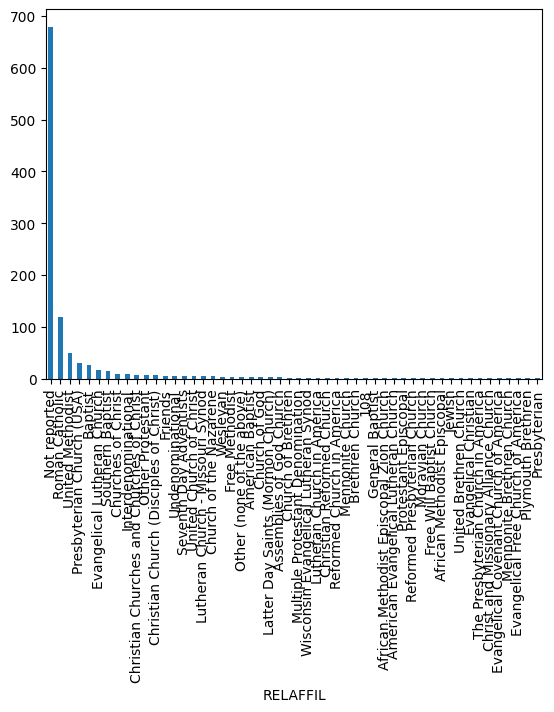

In [317]:
# use matplotlib to plot a bar chart of count of schools in each value of the 'RELAFFIL' column
df['RELAFFIL'].value_counts().plot(kind='bar')
plt.show()

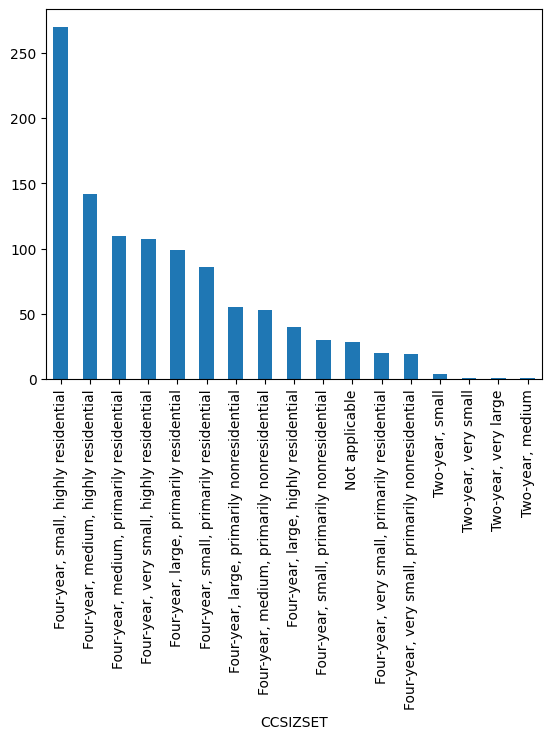

In [318]:
df['CCSIZSET'].value_counts().plot(kind='bar')
plt.show()

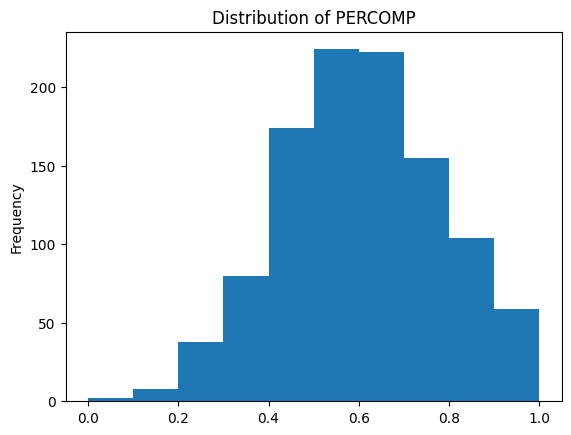

In [319]:
df['PERCOMP'].plot(kind='hist')
# title
plt.title('Distribution of PERCOMP')
plt.show()

### Gower's Distance Measures

In [320]:
df_gower = gower.gower_matrix(df)

In [321]:
df_gower = pd.DataFrame(df_gower, columns=df.index, index=df.index)

# flatten the index
df_gower.index = df_gower.index.get_level_values(0)

In [322]:
df_gower.head(20)

INSTNM,Alabama A & M University,University of Alabama at Birmingham,University of Alabama in Huntsville,Alabama State University,The University of Alabama,Auburn University at Montgomery,Auburn University,Birmingham-Southern College,Faulkner University,Huntingdon College,...,University of North Texas at Dallas,American College of the Building Arts,Kennesaw State University,Milligan University,Emory University-Oxford College,Husson University,Purdue University Northwest,Urshan College,Commonwealth University of Pennsylvania,Pennsylvania Western University
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,0.000000,0.122283,0.128508,0.039820,0.143814,0.102878,0.138000,0.141367,0.121471,0.114826,...,0.117752,0.129283,0.109821,0.130373,0.183349,0.112107,0.099373,0.127327,0.090250,0.096752
University of Alabama at Birmingham,0.122283,0.000000,0.054354,0.120724,0.067344,0.093579,0.049400,0.087703,0.132530,0.110591,...,0.113168,0.098737,0.061758,0.091067,0.126736,0.087296,0.079304,0.120969,0.074645,0.072786
University of Alabama in Huntsville,0.128508,0.054354,0.000000,0.128766,0.068338,0.082737,0.068920,0.083200,0.132249,0.114232,...,0.116004,0.088521,0.084185,0.088688,0.118463,0.094505,0.077311,0.122023,0.088064,0.084172
Alabama State University,0.039820,0.120724,0.128766,0.000000,0.149269,0.092917,0.150899,0.131829,0.112890,0.109327,...,0.109099,0.129553,0.117528,0.129803,0.186543,0.102764,0.103284,0.127509,0.081948,0.092498
The University of Alabama,0.143814,0.067344,0.068338,0.149269,0.000000,0.125222,0.051357,0.104329,0.151690,0.130343,...,0.131949,0.113732,0.075750,0.108408,0.137445,0.109438,0.099523,0.142060,0.103894,0.100713
Auburn University at Montgomery,0.102878,0.093579,0.082737,0.092917,0.125222,0.000000,0.129315,0.113973,0.068980,0.094537,...,0.102194,0.104810,0.088582,0.105079,0.165677,0.082075,0.075511,0.115360,0.068935,0.066715
Auburn University,0.138000,0.049400,0.068920,0.150899,0.051357,0.129315,0.000000,0.101758,0.158767,0.132871,...,0.134665,0.113979,0.068745,0.111005,0.122030,0.116010,0.098475,0.144414,0.111722,0.107681
Birmingham-Southern College,0.141367,0.087703,0.083200,0.131829,0.104329,0.113973,0.101758,0.000000,0.123063,0.076631,...,0.127311,0.103819,0.107363,0.056734,0.106710,0.100682,0.102733,0.122813,0.104776,0.100613
Faulkner University,0.121471,0.132530,0.132249,0.112890,0.151690,0.068980,0.158767,0.123063,0.000000,0.091671,...,0.124114,0.121200,0.121867,0.119106,0.163630,0.084979,0.107142,0.111006,0.100695,0.100820


In [323]:
# replace the diagnal with 10
np.fill_diagonal(df_gower.values, 10)

In [324]:
# round all values in the matrix to 5 decimal places
#df_gower = df_gower.round(4)

In [325]:
df_gower.head(5)

INSTNM,Alabama A & M University,University of Alabama at Birmingham,University of Alabama in Huntsville,Alabama State University,The University of Alabama,Auburn University at Montgomery,Auburn University,Birmingham-Southern College,Faulkner University,Huntingdon College,...,University of North Texas at Dallas,American College of the Building Arts,Kennesaw State University,Milligan University,Emory University-Oxford College,Husson University,Purdue University Northwest,Urshan College,Commonwealth University of Pennsylvania,Pennsylvania Western University
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,10.000000,0.122283,0.128508,0.039820,0.143814,0.102878,0.138000,0.141367,0.121471,0.114826,...,0.117752,0.129283,0.109821,0.130373,0.183349,0.112107,0.099373,0.127327,0.090250,0.096752
University of Alabama at Birmingham,0.122283,10.000000,0.054354,0.120724,0.067344,0.093579,0.049400,0.087703,0.132530,0.110591,...,0.113168,0.098737,0.061758,0.091067,0.126736,0.087296,0.079304,0.120969,0.074645,0.072786
University of Alabama in Huntsville,0.128508,0.054354,10.000000,0.128766,0.068338,0.082737,0.068920,0.083200,0.132249,0.114232,...,0.116004,0.088521,0.084185,0.088688,0.118463,0.094505,0.077311,0.122023,0.088064,0.084172
Alabama State University,0.039820,0.120724,0.128766,10.000000,0.149269,0.092917,0.150899,0.131829,0.112890,0.109327,...,0.109099,0.129553,0.117528,0.129803,0.186543,0.102764,0.103284,0.127509,0.081948,0.092498
The University of Alabama,0.143814,0.067344,0.068338,0.149269,10.000000,0.125222,0.051357,0.104329,0.151690,0.130343,...,0.131949,0.113732,0.075750,0.108408,0.137445,0.109438,0.099523,0.142060,0.103894,0.100713
Auburn University at Montgomery,0.102878,0.093579,0.082737,0.092917,0.125222,10.000000,0.129315,0.113973,0.068980,0.094537,...,0.102194,0.104810,0.088582,0.105079,0.165677,0.082075,0.075511,0.115360,0.068935,0.066715
Auburn University,0.138000,0.049400,0.068920,0.150899,0.051357,0.129315,10.000000,0.101758,0.158767,0.132871,...,0.134665,0.113979,0.068745,0.111005,0.122030,0.116010,0.098475,0.144414,0.111722,0.107681
Birmingham-Southern College,0.141367,0.087703,0.083200,0.131829,0.104329,0.113973,0.101758,10.000000,0.123063,0.076631,...,0.127311,0.103819,0.107363,0.056734,0.106710,0.100682,0.102733,0.122813,0.104776,0.100613
Faulkner University,0.121471,0.132530,0.132249,0.112890,0.151690,0.068980,0.158767,0.123063,10.000000,0.091671,...,0.124114,0.121200,0.121867,0.119106,0.163630,0.084979,0.107142,0.111006,0.100695,0.100820


In [335]:
def find_similar_top10(college_name):
    college_index = df_gower.index.get_loc(college_name)
    college_row = df_gower.iloc[college_index]
    # convert to dataframe and name the column "gowers_distance"
    college_row = pd.DataFrame(college_row, columns=['gowers_distance'])
    #similar_colleges = college_row.nsmallest(11,keep='first')
    similar_colleges = df_gower.sort_values(college_name, ascending=True).head(10)[college_name]
    return similar_colleges

In [327]:
#df_gower.nsmallest(10, 'University of Michigan-Ann Arbor', keep='first')

college_name = 'University of Michigan-Ann Arbor'
college_index = df_gower.index.get_loc(college_name)
print(college_index)
college_row = df_gower.iloc[college_index]
df_collegerow = pd.DataFrame(college_row)

print(df_collegerow)

390
                                         University of Michigan-Ann Arbor
INSTNM                                                                   
Alabama A & M University                                         0.183043
University of Alabama at Birmingham                              0.103106
University of Alabama in Huntsville                              0.100886
Alabama State University                                         0.186483
The University of Alabama                                        0.074989
...                                                                   ...
Husson University                                                0.158374
Purdue University Northwest                                      0.144367
Urshan College                                                   0.193217
Commonwealth University of Pennsylvania                          0.149273
Pennsylvania Western University                                  0.140129

[1066 rows x 1 columns]


In [328]:
college_name = 'University of Michigan-Ann Arbor'
temp = df_gower.nsmallest(10, college_name, keep='first')[college_name]
# put the names in the index of temp into a list
similar_colleges = temp.index.tolist()
print(similar_colleges)

['University of Maryland-College Park', 'University of Florida', 'University of Illinois Urbana-Champaign', 'University of Southern California', 'University of Virginia-Main Campus', 'Northwestern University', 'Rutgers University-New Brunswick', 'University of Wisconsin-Madison', 'New York University', 'Cornell University']


In [329]:
df_similar = pd.DataFrame(columns=['input_school', 'similar1', 'similar2', 'similar3', 'similar4', 'similar5', 'similar6', 'similar7', 'similar8', 'similar9', 'similar10'])

colleges = df_gower.index.tolist()
# reduce to first five colleges
colleges = colleges[:5]

for college in colleges:
        # get the similar colleges for each college
        temp = df_gower.nsmallest(10, college, keep='first')[college]
        # put the names in the index of temp into a list
        similar_colleges = temp.index.tolist()
        # add the college name to the list
        similar_colleges.insert(0, college)
        print(similar_colleges)
        # add the list to the dataframe
        df_similar.loc[len(df_similar)] = similar_colleges

df_similar

['Alabama A & M University', 'Southern University and A & M College', 'Prairie View A & M University', 'Alabama State University', 'Winston-Salem State University', 'Grambling State University', 'North Carolina Central University', 'Virginia State University', 'Delaware State University', 'Texas Southern University', 'Jackson State University']
['University of Alabama at Birmingham', 'Oakland University', 'Indiana University-Purdue University-Indianapolis', 'University of Louisville', 'Northern Kentucky University', 'University of Wisconsin-Milwaukee', 'University of South Florida', 'Mercer University', 'Wichita State University', 'University of North Carolina Wilmington', 'University of North Florida']
['University of Alabama in Huntsville', 'University of Minnesota-Duluth', 'Missouri University of Science and Technology', 'College of Charleston', 'Louisiana Tech University', 'Tennessee Technological University', 'Salisbury University', 'Georgia College & State University', 'Universit

,input_school,similar1,similar2,similar3,similar4,similar5,similar6,similar7,similar8,similar9,similar10
0,Alabama A & M University,Southern University and A & M College,Prairie View A & M University,Alabama State University,Winston-Salem State University,Grambling State University,North Carolina Central University,Virginia State University,Delaware State University,Texas Southern University,Jackson State University
1,University of Alabama at Birmingham,Oakland University,Indiana University-Purdue University-Indianapolis,University of Louisville,Northern Kentucky University,University of Wisconsin-Milwaukee,University of South Florida,Mercer University,Wichita State University,University of North Carolina Wilmington,University of North Florida
2,University of Alabama in Huntsville,University of Minnesota-Duluth,Missouri University of Science and Technology,College of Charleston,Louisiana Tech University,Tennessee Technological University,Salisbury University,Georgia College & State University,University of Wisconsin-Eau Claire,Bradley University,Embry-Riddle Aeronautical University-Daytona B...
3,Alabama State University,Jackson State University,Virginia State University,Alabama A & M University,Southern University and A & M College,Norfolk State University,Prairie View A & M University,Grambling State University,North Carolina Central University,Winston-Salem State University,Texas Southern University
4,The University of Alabama,The University of Tennessee-Knoxville,University of South Carolina-Columbia,Louisiana State University and Agricultural & ...,University of Arkansas,Michigan State University,University of Delaware,University of Cincinnati-Main Campus,University of Colorado Boulder,University of Oklahoma-Norman Campus,Indiana University-Bloomington


In [330]:
def create_similar_colleges(df):
    df_similar = pd.DataFrame(columns=['input_school', 'similar1', 'similar2', 'similar3', 'similar4', 'similar5', 'similar6', 'similar7', 'similar8', 'similar9', 'similar10'])

    # get a list of all the colleges from the index list in df_gower
    colleges = df.index.tolist()
    #print(colleges)

    # iterate through the list of colleges
    for college in colleges:
        # get the similar colleges for each college
        #temp = df.nsmallest(10, college, keep='first')[college]
        temp = df.sort_values(college, ascending=True).head(10)
        # put the names in the index of temp into a list
        similar_colleges = temp.index.tolist()
        # add the college name to the list
        similar_colleges.insert(0, college)
        # add the list to the dataframe
        df_similar.loc[len(df_similar)] = similar_colleges

    return df_similar

In [331]:
temp_df = create_similar_colleges(df_gower)

['Alabama A & M University', 'University of Alabama at Birmingham', 'University of Alabama in Huntsville', 'Alabama State University', 'The University of Alabama', 'Auburn University at Montgomery', 'Auburn University', 'Birmingham-Southern College', 'Faulkner University', 'Huntingdon College', 'Jacksonville State University', 'University of West Alabama', 'University of Mobile', 'Samford University', 'University of South Alabama', 'Spring Hill College', 'Troy University', 'Tuskegee University', 'University of Arizona', 'Embry-Riddle Aeronautical University-Prescott', 'University of Arkansas at Little Rock', 'University of Arkansas', 'University of Arkansas at Pine Bluff', 'Arkansas State University', 'Arkansas Tech University', 'University of Central Arkansas', 'Central Baptist College', 'Harding University', 'Henderson State University', 'Hendrix College', 'John Brown University', 'Ouachita Baptist University', 'University of the Ozarks', 'University of Arkansas Community College-Mor

In [332]:
# get a list of all the colleges from the index list in df_gower
colleges = df_gower.index.tolist()

# count the number of colleges
num_colleges = len(colleges)
print(num_colleges)

# count the number of unique values in the 'colleges'
num_unique_colleges = len(set(colleges))
print(num_unique_colleges)

1066
1066


In [336]:
# find_similar_top10('universityofmichiganannarbor')
find_similar_top10('University of Michigan-Ann Arbor')

INSTNM
University of Maryland-College Park        0.026986
University of Florida                      0.033032
University of Illinois Urbana-Champaign    0.035484
University of Southern California          0.036691
University of Virginia-Main Campus         0.043033
Northwestern University                    0.043992
Rutgers University-New Brunswick           0.045020
University of Wisconsin-Madison            0.045834
New York University                        0.046519
Cornell University                         0.047300
Name: University of Michigan-Ann Arbor, dtype: float32

In [337]:
find_similar_top10('University of Michigan-Flint')

INSTNM
University of South Carolina-Upstate     0.028538
Rhode Island College                     0.030855
Augusta University                       0.033000
Purdue University Northwest              0.033080
University of Arkansas at Little Rock    0.033094
Indiana University-South Bend            0.033180
University of Michigan-Dearborn          0.035870
McNeese State University                 0.036241
University of Missouri-St Louis          0.036279
University of Wisconsin-Parkside         0.037172
Name: University of Michigan-Flint, dtype: float32

In [338]:
# find_similar_top10('michiganstateuniversity')
find_similar_top10('Michigan State University')

INSTNM
University of South Carolina-Columbia                               0.035654
Indiana University-Bloomington                                      0.035919
The University of Tennessee-Knoxville                               0.036260
University of Colorado Boulder                                      0.036263
The University of Alabama                                           0.036469
University of Cincinnati-Main Campus                                0.037068
Rutgers University-New Brunswick                                    0.037496
Colorado State University-Fort Collins                              0.039892
University of Delaware                                              0.040740
Louisiana State University and Agricultural & Mechanical College    0.040950
Name: Michigan State University, dtype: float32

In [ ]:
# find_similar_top10('jacksonstateuniversity')
find_similar_top10('Jackson State University')

### Create csv output

In [ ]:
# create a function that takes a dataframe and string value and returns a csv file
def save_csv(df, filename):
    df.to_csv(filename, index=False)

In [ ]:
save_csv(temp_df, 'data\similar_colleges.csv')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rbouc\AppData\Local\Temp\ipykernel_13872\42993603.py:1: SyntaxWarning: invalid escape sequence '\s'
  save_csv(temp_df, 'data\similar_colleges.csv')
